## Importing required libraries

In [6]:
import os
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
           


## Setting the batch size and path for images

In [8]:
bs = 64  #batch size
sz = 224 #image size
PATH = 'C:/Users/avinash/OneDrive/Documents/CNN_Images/CNN_Images/'

i = 1
for file in os.listdir(PATH):
    os.rename(os.path.join(PATH,file),
             os.path.join(PATH,str(i)))
    i = int(int(i)+1)

    
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  38 classes:
 ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4', '5', '6', '7', '8', '9']


## Normalizing image pixels and loading resnet architecture

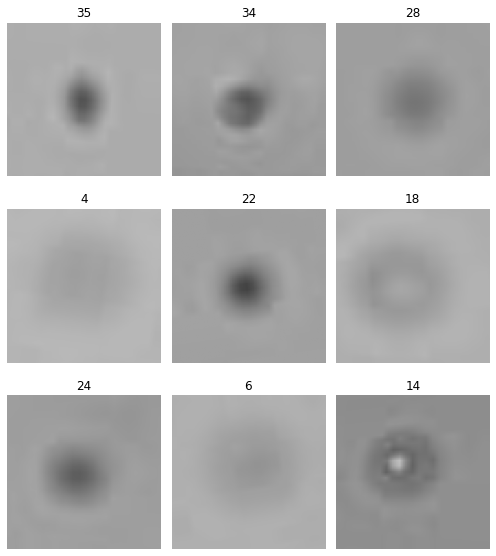

In [9]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,8))

learn = cnn_learner(data, models.resnet34, metrics=accuracy)


## Training the images on ResNet34

In [4]:
learn.fit_one_cycle(1,max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.299533,0.829972,0.662125,1:45:59


> ### Accuracy : 66%

## Visualizing the confusion matrix for the model

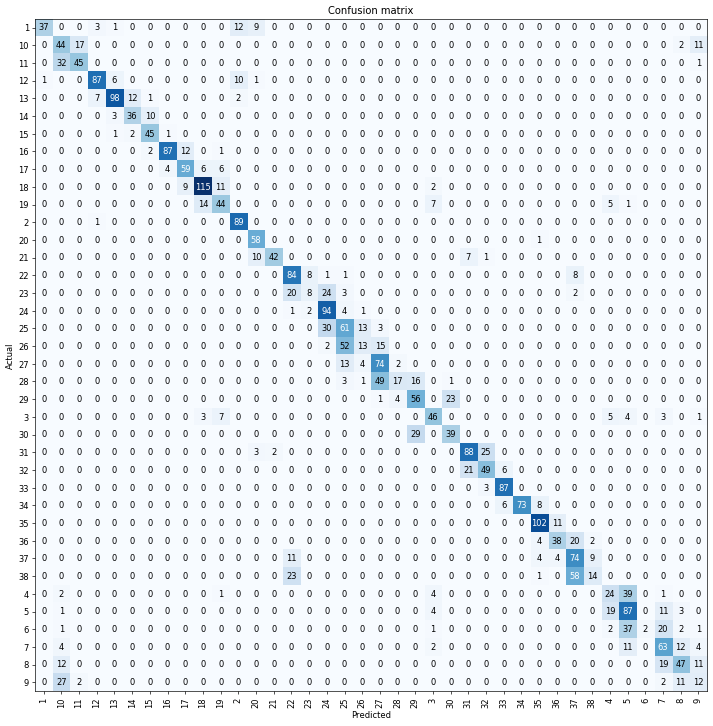

In [5]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
